#### PhD reseach 2020
#### Kittipong Wangnok, D6010218
#### School of Physics, Institute of Science, Suranaree University of Technology

#### 0. Import all modules 

In [1]:
import sys
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from statistics import stdev
from statistics import mean
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

All_contributions_model_dpleo_20200121_run036g.jpg
All_contributions_model_dpleo_20200121_run036g.phase
data_dpleo_20200121_run036g.txt
data_dpleo_20200121_run057r.txt
data_dpleo_20200229_run030kg5.txt
dpleo_20200121_run036g.dat*
dpleo_20200121_run057r.dat*
dpleo_20200229_run030kg5.dat*
lc_dpleo_20200121_run036g.jpg
lc_dpleo_20200121_run036g.phase
lc_dpleo_20200121_run057r.jpg
lc_dpleo_20200121_run057r.phase
lc_dpleo_20200229_run030kg5.jpg
lc_dpleo_20200229_run030kg5.phase
lc_grKG5.ipynb*


#### 1. Input file: lcurve_dpleo_data_g

In [3]:
lcurve_dpleo_g = open("dpleo_20200121_run036g.dat",'r').readlines()
N_lcurve_dpleo_g = len(lcurve_dpleo_g)

g_BJD_time = []
g_BJD_time_err = []
g_Flux = []
g_Flux_err = []

for line in open("dpleo_20200121_run036g.dat"):
    li=line.strip()
    if not li.startswith("#"):
        g_BJD_time.append(float(li.split(" ")[0]))
        g_BJD_time_err.append(float(li.split(" ")[1]))
        g_Flux.append(float(li.split(" ")[2]))
        g_Flux_err.append(float(li.split(" ")[3]))

data_g = []
for i in range (len(lcurve_dpleo_g)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    data_g.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(g_BJD_time[i],g_BJD_time_err[i],g_Flux[i],g_Flux_err[i]))
    
dat = data_g
f = open('data_dpleo_20200121_run036g.txt', 'w')
#for upper_result in upper_result:
for i in range(len(dat)):
    f.write(str(dat[i])+ '\n')
f.close()

#### 2. Input file: lcurve_dpleo_data_r

In [4]:
lcurve_dpleo_r = open("dpleo_20200121_run057r.dat",'r').readlines()
N_lcurve_dpleo_r = len(lcurve_dpleo_r)

r_BJD_time = []
r_BJD_time_err = []
r_Flux = []
r_Flux_err = []

for line in open("dpleo_20200121_run057r.dat"):
    li=line.strip()
    if not li.startswith("#"):
        r_BJD_time.append(float(li.split(" ")[0]))
        r_BJD_time_err.append(float(li.split(" ")[1]))
        r_Flux.append(float(li.split(" ")[2]))
        r_Flux_err.append(float(li.split(" ")[3]))

data_r = []
for i in range (len(lcurve_dpleo_r)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    data_r.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(r_BJD_time[i],r_BJD_time_err[i],r_Flux[i],r_Flux_err[i]))
    
dat = data_r
f = open('data_dpleo_20200121_run057r.txt', 'w')
#for upper_result in upper_result:
for i in range(len(dat)):
    f.write(str(dat[i])+ '\n')
f.close()

#### 3. Input file: lcurve_dpleo_data_KG5

In [5]:
lcurve_dpleo_KG5 = open("dpleo_20200229_run030kg5.dat",'r').readlines()
N_lcurve_dpleo_KG5 = len(lcurve_dpleo_g)

KG5_BJD_time = []
KG5_BJD_time_err = []
KG5_Flux = []
KG5_Flux_err = []

for line in open("dpleo_20200229_run030kg5.dat"):
    li=line.strip()
    if not li.startswith("#"):
        KG5_BJD_time.append(float(li.split(" ")[0]))
        KG5_BJD_time_err.append(float(li.split(" ")[1]))
        KG5_Flux.append(float(li.split(" ")[2]))
        KG5_Flux_err.append(float(li.split(" ")[3]))

data_KG5 = []
for i in range (len(lcurve_dpleo_KG5)):
#    print ('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(dat_BJD_time[i],dat_BJD_time_err[i],dat_Flux[i],dat_Flux_err[i]))
    data_KG5.append('%0.6f\t%0.6f\t%0.6f\t%0.6f' %(KG5_BJD_time[i],KG5_BJD_time_err[i],KG5_Flux[i],KG5_Flux_err[i]))
    
dat = data_KG5
f = open('data_dpleo_20200229_run030kg5.txt', 'w')
#for upper_result in upper_result:
for i in range(len(dat)):
    f.write(str(dat[i])+ '\n')
f.close()

#### 4. DP Leo parameters (plese change t0 for every cycle)

In [6]:
t0_g = 2458870.2589218691
dt0_g = 0.0000000010

t0_r = 2458870.3836516016
dt0_r = 0.0000000010

t0_KG5 = 2458909.2980621108
dt0_KG5 = 0.0000000010

P =  0.0623628426
dP = 0.00000000060

#### 5. Convert to orbital phase  

In [7]:
InputFile_g = "data_dpleo_20200121_run036g.txt"
Data_g   = np.genfromtxt(InputFile_g)

InputFile_r = "data_dpleo_20200121_run057r.txt"
Data_r   = np.genfromtxt(InputFile_r)

InputFile_KG5 = "data_dpleo_20200229_run030kg5.txt"
Data_KG5   = np.genfromtxt(InputFile_KG5)

#Read data
E_g = g_BJD_time[0]
E_r = r_BJD_time[0]
E_KG5 = KG5_BJD_time[0]

BJD_time_g = Data_g[:,0] - E_g
Flux_g = Data_g[:,2]
Flux_err_g = Data_g[:,3]

BJD_time_r = Data_r[:,0] - E_r
Flux_r = Data_r[:,2]
Flux_err_r = Data_r[:,3]

BJD_time_KG5 = Data_KG5[:,0] - E_KG5
Flux_KG5 = Data_KG5[:,2]
Flux_err_KG5 = Data_KG5[:,3]

In [8]:
Phase_input_g = []
for i in range(len(BJD_time_g)):
    g_Phase_obs = ((BJD_time_g[i]+E_g) - t0_g)/P
    g_Flux_obs = Flux_g 
    g_dFlux_obs = Flux_err_g
#    print('%0.10f %0.6f %0.6f %0.10f %0.6f %0.10f %0.6f' %(Phase_obs, Flux_1[i], Flux_err_1[i], Phase_model, Flux_2[i], Phase_wd, Flux_wd[i]))
    Phase_input_g.append('%0.10f %0.6f %0.6f' %(g_Phase_obs, g_Flux_obs[i], g_dFlux_obs[i]))
    
data_out = Phase_input_g
f = open("lc_dpleo_20200121_run036g.phase", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()    

Phase_input_r = []
for i in range(len(BJD_time_r)):
    r_Phase_obs = ((BJD_time_r[i]+E_r) - t0_r)/P
    r_Flux_obs = Flux_r 
    r_dFlux_obs = Flux_err_r
#    print('%0.10f %0.6f %0.6f %0.10f %0.6f %0.10f %0.6f' %(Phase_obs, Flux_1[i], Flux_err_1[i], Phase_model, Flux_2[i], Phase_wd, Flux_wd[i]))
    Phase_input_r.append('%0.10f %0.6f %0.6f' %(r_Phase_obs, r_Flux_obs[i], r_dFlux_obs[i]))
    
data_out = Phase_input_r
f = open("lc_dpleo_20200121_run057r.phase", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close() 

Phase_input_KG5 = []
for i in range(len(BJD_time_KG5)):
    KG5_Phase_obs = ((BJD_time_KG5[i]+E_KG5) - t0_KG5)/P
    KG5_Flux_obs = Flux_KG5 
    KG5_dFlux_obs = Flux_err_KG5
#    print('%0.10f %0.6f %0.6f %0.10f %0.6f %0.10f %0.6f' %(Phase_obs, Flux_1[i], Flux_err_1[i], Phase_model, Flux_2[i], Phase_wd, Flux_wd[i]))
    Phase_input_KG5.append('%0.10f %0.6f %0.6f' %(KG5_Phase_obs, KG5_Flux_obs[i], KG5_dFlux_obs[i]))
    
data_out = Phase_input_KG5
f = open("lc_dpleo_20200229_run030kg5.phase", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close() 

#### 6. Plot the result: Relative flux vs. BJD

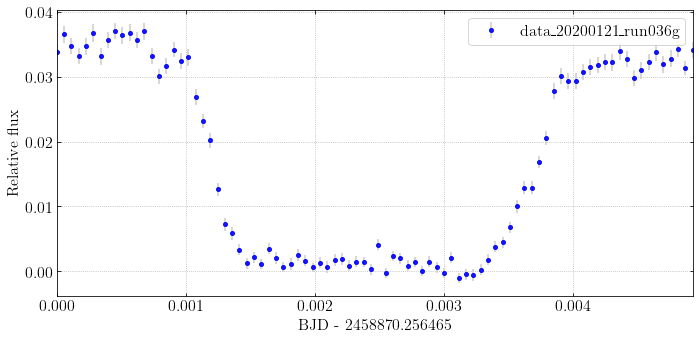

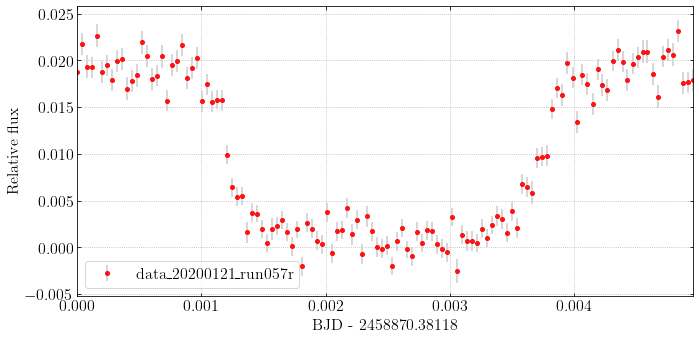

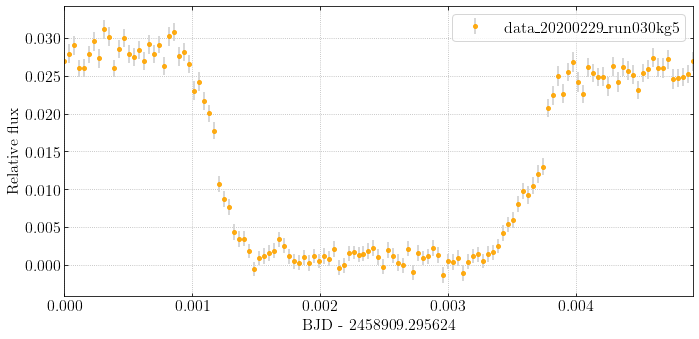

In [9]:
fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlim(BJD_time_g[0], BJD_time_g[-1])
plt.xlabel('BJD - '+str(E_g))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax0.grid(linestyle='dotted')
ax0.errorbar(BJD_time_g, Flux_g, yerr=Flux_err_g, fmt='o', color='blue',alpha = 0.9,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200121\_run036g')
ax0.legend(loc="best")
ax0.set_ylabel('Relative flux')
fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("lc_dpleo_20200121_run036g.jpg", format='jpg', dpi=1200)
plt.show()


fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlim(BJD_time_r[0], BJD_time_r[-1])
plt.xlabel('BJD - '+str(E_r))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax0.grid(linestyle='dotted')
ax0.errorbar(BJD_time_r, Flux_r, yerr=Flux_err_r, fmt='o', color='red',alpha = 0.9,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200121\_run057r')
ax0.legend(loc="best")
ax0.set_ylabel('Relative flux')
fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("lc_dpleo_20200121_run057r.jpg", format='jpg', dpi=1200)
plt.show()


fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlim(BJD_time_KG5[0], BJD_time_KG5[-1])
plt.xlabel('BJD - '+str(E_KG5))

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax0.grid(linestyle='dotted')
ax0.errorbar(BJD_time_KG5, Flux_KG5, yerr=Flux_err_KG5, fmt='o', color='orange',alpha = 0.9,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200229\_run030kg5')
ax0.legend(loc="best")
ax0.set_ylabel('Relative flux')
fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("lc_dpleo_20200229_run030kg5.jpg", format='jpg', dpi=1200)
plt.show()

#### 7. Plot the result: Relative flux vs. orbital phase 

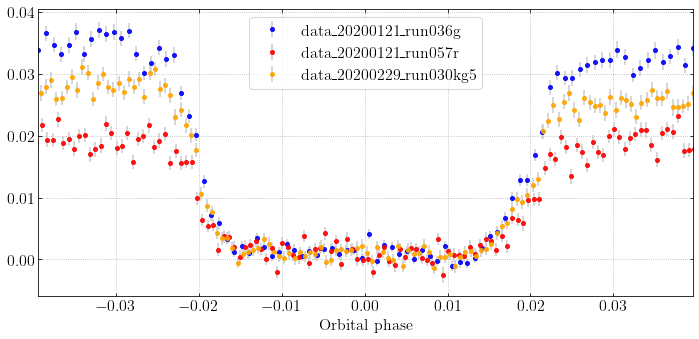

In [10]:
InputFile_g = "lc_dpleo_20200121_run036g.phase"
Data_g   = np.genfromtxt(InputFile_g)

#Read data
g_Phase_obs = Data_g[:,0]
g_Flux_obs = Data_g[:,1]
g_dFlux_obs = Data_g[:,2]


InputFile_r = "lc_dpleo_20200121_run057r.phase"
Data_r   = np.genfromtxt(InputFile_r)

#Read data
r_Phase_obs = Data_r[:,0]
r_Flux_obs = Data_r[:,1]
r_dFlux_obs = Data_r[:,2]

InputFile_KG5 = "lc_dpleo_20200229_run030kg5.phase"
Data_KG5   = np.genfromtxt(InputFile_KG5)

#Read data
KG5_Phase_obs = Data_KG5[:,0]
KG5_Flux_obs = Data_KG5[:,1]
KG5_dFlux_obs = Data_KG5[:,2]



fig, (ax0) = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(10, 5), tight_layout=True)
plt.xlim(g_Phase_obs[0], g_Phase_obs[-1])
plt.xlabel('Orbital phase')

ax0.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
ax0.grid(linestyle='dotted')

ax0.errorbar(g_Phase_obs, g_Flux_obs, yerr=g_dFlux_obs, fmt='o', color='blue',alpha = 0.9,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200121\_run036g')
ax0.errorbar(r_Phase_obs, r_Flux_obs, yerr=r_dFlux_obs, fmt='o', color='red',alpha = 0.9,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200121\_run057r')
ax0.errorbar(KG5_Phase_obs, KG5_Flux_obs, yerr=KG5_dFlux_obs, fmt='o', color='orange',alpha = 0.9,
                    ecolor='lightgray', elinewidth=2, capsize=0, markersize='4.00', label = 'data\_20200229\_run030kg5')
#ax0.plot(Phase_model, Flux_model, 'b-', label='All contributions, $\chi^2$ = '+str('%0.3f' %(chisq)))
ax0.legend(loc="best")
#ax0.set_ylabel('Relative flux')

fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("lc_grKG5.jpg", format='jpg', dpi=1200)
plt.show()